In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Load regional data

In [2]:
#nomiregioni=['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
   # 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
   #    'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
   #    'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
   #    'Veneto']

nomiregioni       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])
len(nomiregioni)

21

In [3]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

datatot

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,2020-08-05T17:00:00,ITA,19,Sicilia,38.115697,13.362357,34,4,38,276,...,21,21,2741,284,2840.0,499.0,3339,286665,223645.0,NaN
3440,2020-08-05T17:00:00,ITA,9,Toscana,43.769231,11.255889,18,0,18,397,...,10,11,8978,1137,10282.0,248.0,10530,438634,289710.0,NaN
3441,2020-08-05T17:00:00,ITA,10,Umbria,43.106758,12.388247,6,0,6,24,...,1,2,1369,80,1452.0,27.0,1479,124855,80145.0,NaN
3442,2020-08-05T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,1,0,1,11,...,-1,0,1051,146,1091.0,118.0,1209,21983,15855.0,NaN


In [37]:
def dataregion(name):

    mask = datatot['denominazione_regione']==name
    data =datatot.loc[mask,:]
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']

    #print(data.iloc[-1,:])

    yinfected=np.array(ydata-ydata_death-ydata_rec)
    
    return yinfected,ydata_death

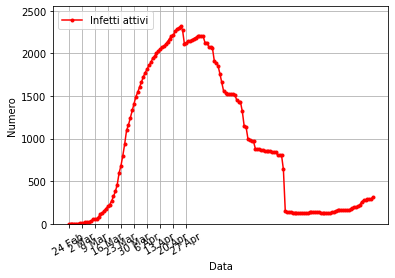

In [5]:
yinfected=dataregion('Sicilia')
xdata=np.arange(len(yinfected))

xgrid=np.arange(0,60,0.1)

#plt.figure(figsize=(9,7))
plt.plot(xdata,yinfected,label='Infetti attivi',marker='.',color='red')
#plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
#plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
#plt.plot(xgrid,esponenziale(xgrid,-15,1.1),label='Exponential (10% more per day)',color='purple',linestyle='--')
#plt.plot(xgrid,lineare(xgrid,9,240),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,70,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.ylim(0,yinfected.max()*1.1)
plt.legend(loc=2)
plt.grid()
plt.savefig('output/Data only_MOLISE_line.png',dpi=300)
plt.show()

## dati nazionali

In [6]:
data_naz = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data_naz.shape[0]))
ydata=data_naz['totale_casi']
ydata_death=data_naz['deceduti']
ydata_rec=data_naz['dimessi_guariti']

yinfected_naz=ydata-ydata_rec-ydata_death

print(data_naz.iloc[-1,0])

data_naz.head()

2020-08-05T17:00:00


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


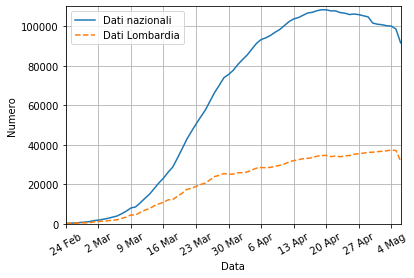

In [7]:
plt.plot(xdata,yinfected_naz,label='Dati nazionali')
plt.plot(xdata,dataregion('Lombardia'),'--',label='Dati Lombardia')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,71,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'],rotation=30)
plt.ylim(0,110000)
plt.xlim(0,72)
plt.legend()
plt.grid()
plt.show()

### modello SIR per singola regione

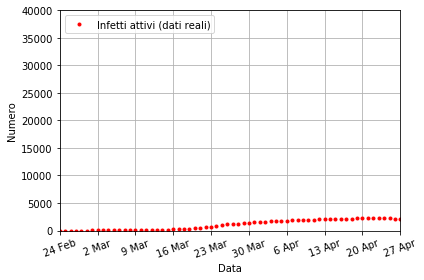

In [8]:
#fin_result=time_evo(10**7,0.41,26.,1/14,0,t_tresh=17,I0=0.4)
#t=fin_result[0]
#i_vec=fin_result[2]

plt.plot(xdata+17,yinfected,label='Infetti attivi (dati reali)',marker='.',color='red',linestyle='None')
#plt.plot(t,i_vec,label='SIR 2.0 fit',color='red')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(17,90,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag'],rotation=20)
plt.ylim(0,40000)
plt.xlim(17,80)
plt.legend(loc=2)
plt.grid()
plt.tight_layout()
plt.savefig('output/SIR_Lombardia.png',dpi=300)
plt.show()

In [9]:
#y_exp=yinfected
#y_th=i_vec[17:len(y_exp)+17]
#avg_err=round(np.mean(np.abs(y_exp-y_th)/y_exp)*100,1)

#print('average error',avg_err,'%')

## plot regionali

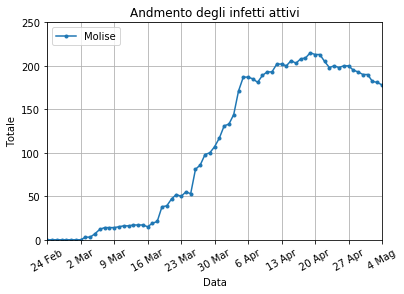

In [10]:
plt.plot(xdata,dataregion('Molise'),marker='.',label='Molise')
plt.xlabel('Data')
plt.ylabel('Totale')
plt.xticks(np.arange(0,80,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'],rotation=30)
plt.ylim(0,250)
plt.xlim(0,70)
plt.title('Andmento degli infetti attivi')
plt.legend(loc=2)
plt.grid()
#plt.savefig('output/infettiattivi_regioni_parz.png',dpi=300)
plt.show()

In [11]:
nomiregioni       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna',
                              'Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte',
                              'Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])



pop_regioni   =  np.array([1304970, 559084,533050, 1947131, 5801692, 4459477, 1215220, 5879082, 1550640, 10060574, 1525271, 305617, 4356406, 4029053, 1639591, 4999891, 3729641,541380, 882015, 125666, 4905854])


df_popregioni=pd.DataFrame(pop_regioni)
df_popregioni.index=nomiregioni
df_popregioni.columns=['Popolazione']

df_popregioni

,Popolazione
Abruzzo,1304970
Basilicata,559084
P.A. Bolzano,533050
Calabria,1947131
Campania,5801692
Emilia-Romagna,4459477
Friuli Venezia Giulia,1215220
Lazio,5879082
Liguria,1550640
Lombardia,10060574


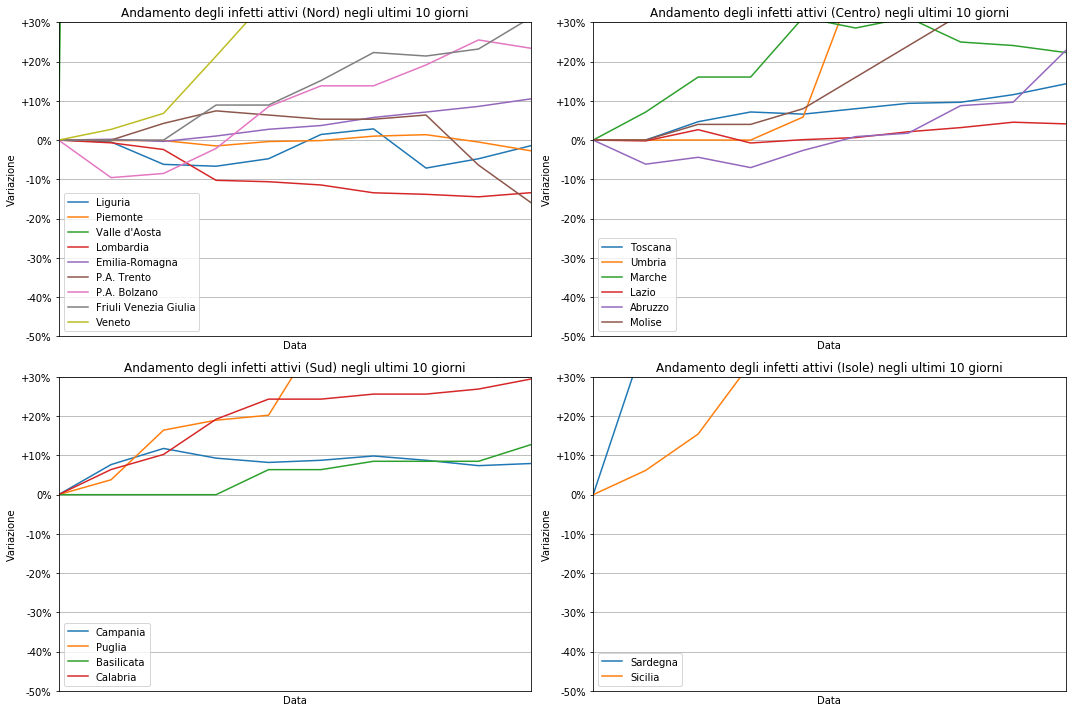

In [12]:
tpast=10

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.grid()
for reg in ['Liguria','Piemonte','Valle d\'Aosta','Lombardia','Emilia-Romagna','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia','Veneto']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Nord) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,2)
plt.grid()
for reg in ['Toscana','Umbria','Marche','Lazio','Abruzzo','Molise']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Centro) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,3)
plt.grid()
for reg in ['Campania','Puglia','Basilicata','Calabria']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Sud) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.subplot(2,2,4)
plt.grid()
for reg in ['Sardegna','Sicilia']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/ydata_inf[-tpast]*100,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Variazione')
    plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(45,70,2),['9 Apr','11 Apr','13 Apr','15 Apr','17 Apr','19 Apr','21 Apr','23 Apr'])
    plt.ylim(50,130)
    plt.xlim(len(xdata)-tpast,len(xdata)-1)
    plt.title('Andamento degli infetti attivi (Isole) negli ultimi 10 giorni')
    plt.legend(loc=3)
plt.tight_layout()
plt.savefig('output/infettiattivi_regioni.png',dpi=300)
plt.show()

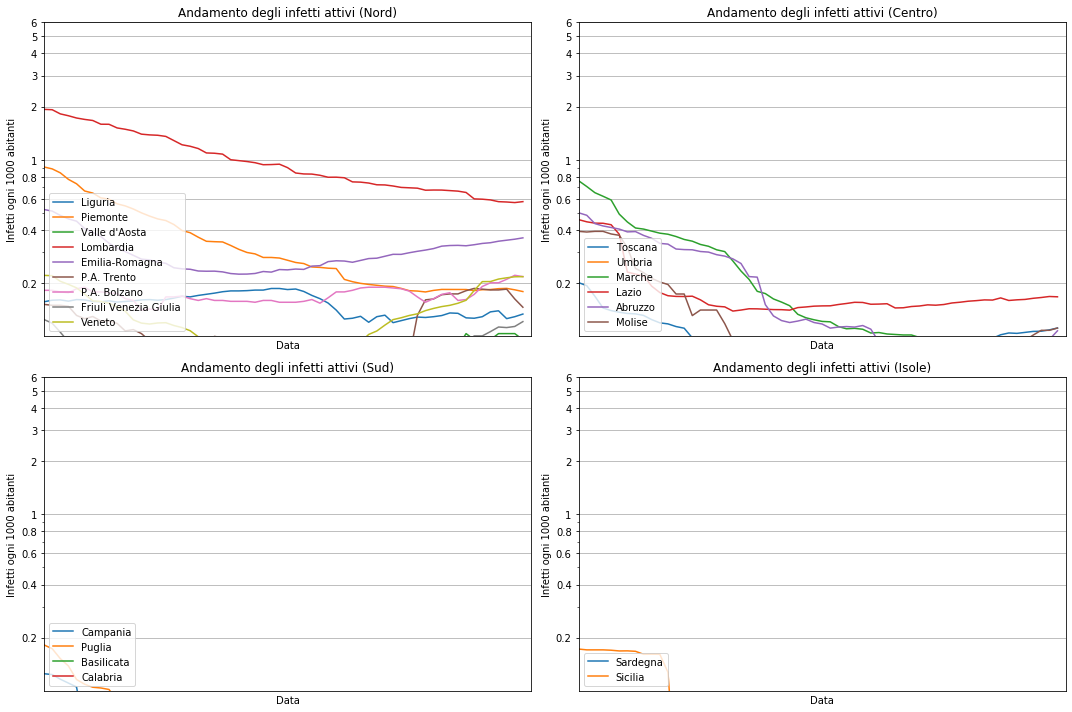

In [13]:
tpast=60

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.grid()
for reg in ['Liguria','Piemonte','Valle d\'Aosta','Lombardia','Emilia-Romagna','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia','Veneto']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0.1,6)
    plt.yscale('log')
    plt.yticks([0.2,0.4,0.6,0.8,1,2,3,4,5,6],['0.2','0.4','0.6','0.8','1','2','3','4','5','6'])
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Nord)')
    plt.legend(loc=3)
plt.subplot(2,2,2)
plt.grid()
for reg in ['Toscana','Umbria','Marche','Lazio','Abruzzo','Molise']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0.1,6)
    plt.yscale('log')
    plt.yticks([0.2,0.4,0.6,0.8,1,2,3,4,5,6],['0.2','0.4','0.6','0.8','1','2','3','4','5','6'])
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Centro)')
    plt.legend(loc=3)
plt.subplot(2,2,3)
plt.grid()
for reg in ['Campania','Puglia','Basilicata','Calabria']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0.1,6)
    plt.yscale('log')
    plt.yticks([0.2,0.4,0.6,0.8,1,2,3,4,5,6],['0.2','0.4','0.6','0.8','1','2','3','4','5','6'])
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Sud)')
    plt.legend(loc=3)
plt.subplot(2,2,4)
plt.grid()
for reg in ['Sardegna','Sicilia']:
    ydata_inf=dataregion(reg)
    plt.plot(xdata,ydata_inf/df_popregioni.loc[reg,'Popolazione']*1000,label=reg)
    plt.xlabel('Data')
    plt.ylabel('Infetti ogni 1000 abitanti')
    #plt.yticks(np.arange(50,131,10),['-50%','-40%','-30%','-20%','-10%','0%','+10%','+20%','+30%'])
    plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr'])
    plt.ylim(0.1,6)
    plt.yscale('log')
    plt.yticks([0.2,0.4,0.6,0.8,1,2,3,4,5,6],['0.2','0.4','0.6','0.8','1','2','3','4','5','6'])
    plt.xlim(len(xdata)-tpast,len(xdata))
    plt.title('Andamento degli infetti attivi (Isole)')
    plt.legend(loc=3)
plt.tight_layout()
plt.savefig('output/infettiattivi_regioni_normalizzati.png',dpi=300)
plt.show()

### confronto regioni

In [14]:
df_regioni_infetti=[]

for reg in nomiregioni:
    df_regioni_infetti.append([reg,dataregion(reg)[-1]])
    
df_regioni_infetti2=pd.DataFrame(df_regioni_infetti)
df_regioni_infetti2.columns=['Regioni','Infetti']

df_regioni_infetti2_sorted=df_regioni_infetti2.sort_values(by='Infetti',ascending=False)
nomiregioni_new=np.array(df_regioni_infetti2_sorted['Regioni'])

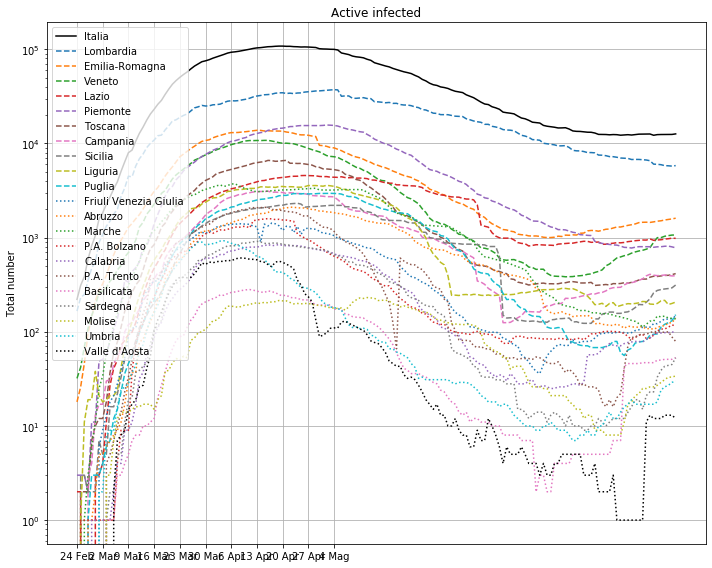

In [15]:
plt.figure(figsize=(10,8))
plt.plot(yinfected_naz,color='black',label='Italia')
for reg in range(len(nomiregioni_new)):
    if reg<=9:
        plt.plot(dataregion(nomiregioni_new[reg]),label=nomiregioni_new[reg],linestyle='--')
    elif reg>9 and reg<20:
        plt.plot(dataregion(nomiregioni_new[reg]),label=nomiregioni_new[reg],linestyle=':')
    elif reg==20:
        plt.plot(dataregion(nomiregioni_new[reg]),label=nomiregioni_new[reg],linestyle=':',color='black')
plt.yscale('log')
plt.xticks(np.arange(0,72,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'])
plt.grid()
plt.title('Active infected')
plt.ylabel('Total number')
plt.legend()
plt.tight_layout()
plt.savefig('output/confronto_regioni_log.png',dpi=300)
plt.show()

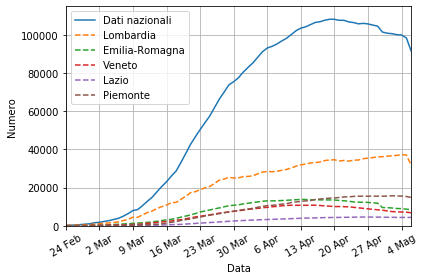

In [16]:
plt.plot(xdata,yinfected_naz,label='Dati nazionali')
for reg in range(5):
    plt.plot(dataregion(nomiregioni_new[reg]),label=nomiregioni_new[reg],linestyle='--')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,71,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'],rotation=30)
plt.ylim(0,115000)
plt.xlim(0,72)
plt.legend()
#plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.savefig('output3/italy_vs_regions.png',dpi=300)
plt.show()

# altri confronti

In [17]:
# confronto Molise-Lombardia

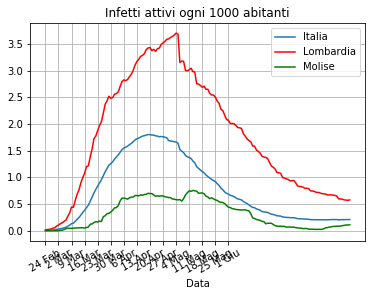

In [18]:
data_lomb=dataregion('Lombardia')/df_popregioni.loc['Lombardia','Popolazione']*1000
data_mol=dataregion('Molise')/df_popregioni.loc['Molise','Popolazione']*1000

plt.plot(yinfected_naz/(6*10**7)*1000,label='Italia')
plt.plot(data_lomb,label='Lombardia',color='red')
plt.plot(data_mol,label='Molise',color='green')
#plt.plot(data_mol*42/25,label='Molise \n(norm. ai tamponi della Lombardia)',color='green',linestyle='--')
plt.xlabel('Data')
#plt.ylabel('Infetti ogni 1000 abitanti')
plt.xticks(np.arange(0,100,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu'],rotation=30)
plt.title('Infetti attivi ogni 1000 abitanti')
plt.grid()
plt.legend()
plt.savefig('output/confronto-Lombardia-Molise.png',dpi=300)
plt.show()

In [19]:
# tamponi

tamp_lomb=datatot[datatot['denominazione_regione']=='Lombardia'].tamponi.iloc[-1]/df_popregioni.loc['Lombardia','Popolazione']*1000
tamp_mol=datatot[datatot['denominazione_regione']=='Molise'].tamponi.iloc[-1]/df_popregioni.loc['Molise','Popolazione']*1000

print('tamponi in Lombardia ogni 1000 abitanti ',round(tamp_lomb))
print('tamponi in Molise ogni 1000 abitanti ',round(tamp_mol))

tamponi in Lombardia ogni 1000 abitanti  133.0
tamponi in Molise ogni 1000 abitanti  93.0


In [20]:
# suscettibili

In [21]:
pop_lomb=df_popregioni.loc['Lombardia','Popolazione']
pop_mol=df_popregioni.loc['Molise','Popolazione']

casi_lomb=datatot[datatot['denominazione_regione']=='Lombardia'].totale_casi.iloc[-1]
casi_mol=datatot[datatot['denominazione_regione']=='Molise'].totale_casi.iloc[-1]

print('suscettibili in Molise ',round((pop_mol-3*casi_mol)/pop_mol*100,3),'%')
print('suscettibili in Lombardia ',round((pop_lomb-3*casi_lomb)/pop_lomb*100,3),'%')

print('suscettibili in Molise ',round((pop_mol-10*casi_mol)/pop_mol*100,3),'%')
print('suscettibili in Lombardia ',round((pop_lomb-10*casi_lomb)/pop_lomb*100,3),'%')

suscettibili in Molise  99.531 %
suscettibili in Lombardia  97.122 %
suscettibili in Molise  98.436 %
suscettibili in Lombardia  90.406 %


In [22]:
casi_lomb

96519

In [23]:
casi_mol

478

## Italia e Lombardia

In [24]:
# The SIR model differential equations.
def deriv_SIR(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

def SIR(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_SIR, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

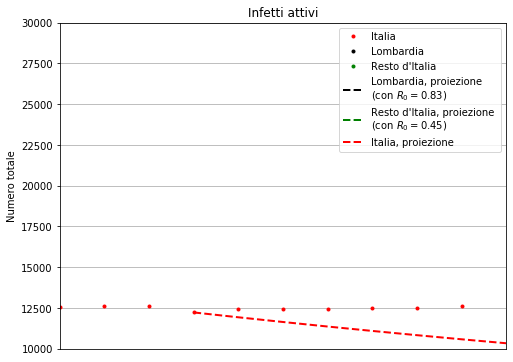

In [25]:
ydata_inf=np.array(yinfected_naz)

SIR_vec=SIR(50*10**6,0.45*1/14,1/14,I0=ydata_inf[-7]-dataregion('Lombardia')[-7],R0=750000)

t_vec=SIR_vec[0]
i_vec=SIR_vec[2]


SIR_vec_L=SIR(10*10**6,0.89*1/14,1/14,I0=dataregion('Lombardia')[-7],R0=240000)

t_vec_L=SIR_vec_L[0]
i_vec_L=SIR_vec_L[2]

# italia senza lombardia

plt.figure(figsize=(8,6))
plt.plot(yinfected_naz,'.',label='Italia',color='red')
plt.plot(dataregion('Lombardia'),'.',label='Lombardia',color='black')
plt.plot(yinfected_naz-dataregion('Lombardia'),'.',label='Resto d\'Italia',color='green')
plt.plot(t_vec+len(ydata_inf)-7,i_vec_L,color='black',linestyle='--',linewidth=2,label='Lombardia, proiezione \n(con $R_0=0.83$)')
plt.plot(t_vec+len(ydata_inf)-7,i_vec,color='green',linestyle='--',linewidth=2,label='Resto d\'Italia, proiezione \n(con $R_0=0.45$)')
plt.plot(t_vec+len(ydata_inf)-7,i_vec+i_vec_L,color='red',linewidth=2,linestyle='--',label='Italia, proiezione')
plt.xticks(np.arange(0,150,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu','8 Giu','15 Giu','22 Giu','29 Giu','5 Lug','12 Lug','19 Lug','26 Lug'],rotation=30)
plt.ylim(10000,30000)
plt.xlim(len(ydata_inf)-10,len(ydata_inf))
plt.title('Infetti attivi')
plt.ylabel('Numero totale')
plt.legend()
plt.grid()
plt.savefig('output/nolombardia.png',dpi=300)
plt.show()

In [26]:
ydata_inf[-1]-ydata_inf[-8]

30

In [27]:
(0*yinfected_naz+dataregion('Lombardia'))

0       166
1       231
2       249
3       349
4       474
       ... 
159    5955
160    5821
161    5795
162    5752
163    5823
Length: 164, dtype: int64

In [28]:
yinfected_naz.max()

108257

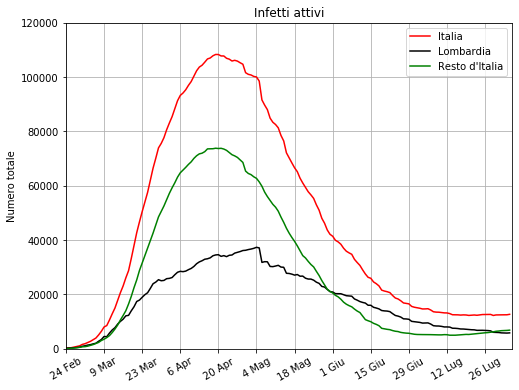

In [29]:
# italia senza lombardia

L_up=SIR(10*10**6,0.89*1.2*1/14,1/14,I0=dataregion('Lombardia')[-7],R0=240000)[2]
L_down=SIR(10*10**6,0.89*0.8*1/14,1/14,I0=dataregion('Lombardia')[-7],R0=240000)[2]
RI_up=SIR(50*10**6,0.45*1.2*1/14,1/14,I0=ydata_inf[-7]-dataregion('Lombardia')[-7],R0=750000)[2]
RI_down=SIR(50*10**6,0.45*0.8*1/14,1/14,I0=ydata_inf[-7]-dataregion('Lombardia')[-7],R0=750000)[2]

plt.figure(figsize=(8,6))
plt.plot(yinfected_naz,label='Italia',color='red')
plt.plot(dataregion('Lombardia'),label='Lombardia',color='black')
plt.plot(yinfected_naz-dataregion('Lombardia'),label='Resto d\'Italia',color='green')
#plt.fill_between(t_vec+len(ydata_inf)-7,L_up,L_down,color='black',alpha=0.5)
#plt.fill_between(t_vec+len(ydata_inf)-7,RI_up,RI_down,color='green',alpha=0.5)
#plt.fill_between(t_vec+len(ydata_inf)-7,RI_up+L_up,RI_down+L_down,color='red',alpha=0.5)
#plt.plot(t_vec+len(ydata_inf)-7,i_vec_L,color='black',linestyle='--',linewidth=2,label='Lombardia, proiezione \n(con $R_0=0.83$)')
#plt.plot(t_vec+len(ydata_inf)-7,i_vec,color='green',linestyle='--',linewidth=2,label='Resto d\'Italia, proiezione \n(con $R_0=0.45$)')
#plt.plot(t_vec+len(ydata_inf)-7,i_vec+i_vec_L,color='red',linewidth=2,linestyle='--',label='Italia, proiezione')
plt.xticks(np.arange(0,250,14),['24 Feb','9 Mar','23 Mar','6 Apr','20 Apr','4 Mag','18 Mag','1 Giu','15 Giu','29 Giu','12 Lug','26 Lug','9 Ago','23 Ago','6 Set'],rotation=30)
plt.ylim(0,120000)
plt.xlim(0,len(ydata_inf))
plt.title('Infetti attivi')
plt.ylabel('Numero totale')
plt.legend()
plt.grid()
plt.savefig('output/nolombardia_forecast.png',dpi=300)
plt.show()

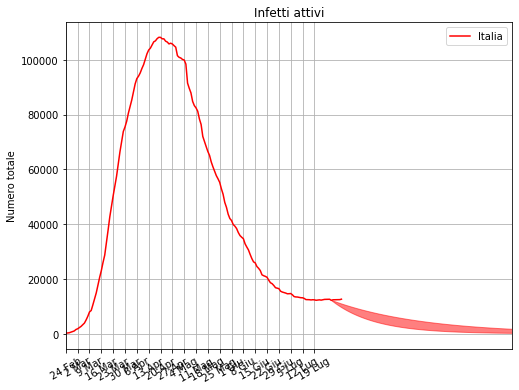

In [30]:
i_vec1=SIR(50*10**6,0.75*1/14,1/14,I0=ydata_inf[-7],R0=750000)[2]
i_vec2=SIR(50*10**6,0.45*1/14,1/14,I0=ydata_inf[-7],R0=750000)[2]

plt.figure(figsize=(8,6))
plt.plot(yinfected_naz,label='Italia',color='red')
#plt.plot(t_vec+len(ydata_inf)-7,i_vec,color='red',linewidth=2,linestyle='--',label='Italia, proiezione')
plt.fill_between(t_vec+len(ydata_inf)-7,i_vec1,i_vec2,color='red',alpha=0.5)
plt.xticks(np.arange(0,150,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag','25 Mag','1 Giu','8 Giu','15 Giu','22 Giu','29 Giu','5 Lug','12 Lug','19 Lug','26 Lug'],rotation=30)
plt.xlim(0,len(ydata_inf)+100)
plt.title('Infetti attivi')
plt.ylabel('Numero totale')
plt.legend()
plt.grid()
plt.savefig('output/nolombardia.png',dpi=300)
plt.show()

In [31]:
yinfected_restoitalia=np.array(yinfected_naz-dataregion('Lombardia'))
yinfected_lombardia=np.array(dataregion('Lombardia'))

sup_lomb=23844 # in km2
sup_restoitalia=301338 -sup_lomb # in km2


print('infetti al km^2 resto d\'Italia',yinfected_restoitalia[-1],round(yinfected_restoitalia[-1]/sup_restoitalia,3))
print('infetti al km^2 in Lombardia',yinfected_lombardia[-1],round(yinfected_lombardia[-1]/sup_lomb,3))

infetti al km^2 resto d'Italia 6823 0.025
infetti al km^2 in Lombardia 5823 0.244


In [32]:
sup_restoitalia

277494

### curva normalizzata ai tamponi

[]

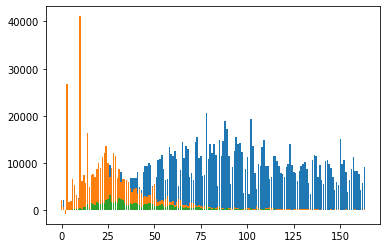

In [33]:
# infetti lombardia 
yinf_lomb_incr=np.array(datatot[datatot['denominazione_regione']=='Lombardia'].nuovi_positivi)

# tamponi lombardia
tamp_lomb=np.array(datatot[datatot['denominazione_regione']=='Lombardia'].tamponi)
tamp_lomb_var=[1500]
for i in range(len(tamp_lomb)-1):
    tamp_lomb_var.append(tamp_lomb[i+1]-tamp_lomb[i])
tamp_lomb_var=np.array(tamp_lomb_var)

# infetti lombardia normalizzati ai tamponi
yinf_lomb_tamp=yinf_lomb_incr*(tamp_lomb_var/tamp_lomb_var.max())**-1

plt.bar(np.arange(len(tamp_lomb_var)),tamp_lomb_var)
plt.bar(np.arange(len(tamp_lomb_var)),yinf_lomb_tamp)
plt.bar(np.arange(len(tamp_lomb_var)),yinf_lomb_incr)
plt.plot()

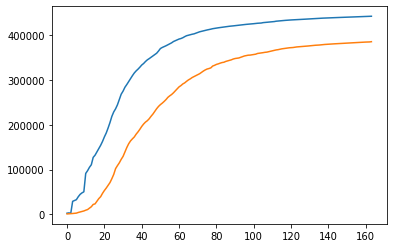

In [34]:
plt.plot(np.cumsum(yinf_lomb_tamp),label='casi totali')
plt.plot(np.cumsum(yinf_lomb_incr)*4,label='casi totali normalizzati ai tamponi')
plt.show()

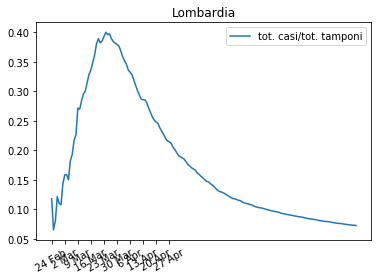

In [35]:
ytot_lomb=np.array(datatot[datatot['denominazione_regione']=='Lombardia'].totale_casi)
tamp_lomb=np.array(datatot[datatot['denominazione_regione']=='Lombardia'].tamponi)

plt.plot(ytot_lomb/tamp_lomb,label='tot. casi/tot. tamponi')
plt.xticks(np.arange(0,70,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'],rotation=30)
plt.title('Lombardia')
plt.legend()
plt.savefig('output/lomb_tamp.png',dpi=300)
plt.show()

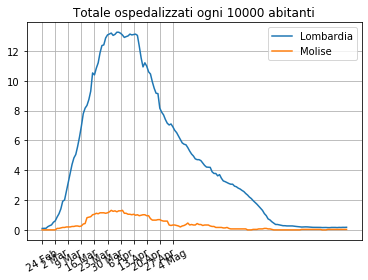

In [36]:
osp_lomb=np.array(datatot[datatot['denominazione_regione']=='Lombardia'].totale_ospedalizzati)
osp_mol=np.array(datatot[datatot['denominazione_regione']=='Molise'].totale_ospedalizzati)

plt.plot(osp_lomb/df_popregioni.loc['Lombardia','Popolazione']*10000,label='Lombardia')
plt.plot(osp_mol/df_popregioni.loc['Molise','Popolazione']*10000,label='Molise')
plt.xticks(np.arange(0,75,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'],rotation=30)
plt.title('Totale ospedalizzati ogni 10000 abitanti')
plt.legend()
plt.grid()
plt.savefig('output/mol_lomb_ospedale.png',dpi=300)
plt.show()

# confronto con Svezia

In [104]:
# lombardia

morti_lombardia=dataregion('Lombardia')[1]

In [105]:
# italia

data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

ydata_death=np.array(ydata_death)
ydata_rec=np.array(ydata_rec)
ydata=np.array(ydata)

ydata_inf=np.array(ydata-ydata_rec-ydata_death)

print(data.iloc[-1,:])

data.head()

data                            2020-08-05T17:00:00
stato                                           ITA
ricoverati_con_sintomi                          764
terapia_intensiva                                41
totale_ospedalizzati                            805
isolamento_domiciliare                        11841
totale_positivi                               12646
variazione_totale_positivi                      164
nuovi_positivi                                  384
dimessi_guariti                              200976
deceduti                                      35181
casi_da_sospetto_diagnostico                 223044
casi_da_screening                             25759
totale_casi                                  248803
tamponi                                     7041040
casi_testati                            4.18476e+06
note                                            NaN
Name: 163, dtype: object


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


In [106]:
# resto d'italia

morti_restoitalia=(ydata_death-morti_lombardia)/(5*10**7)*10**6
df_morti=pd.DataFrame(morti_restoitalia)
df_time=pd.to_datetime(np.arange(len(morti_restoitalia)),unit='D',origin=pd.Timestamp('2020-02-24'))
df_morti.index=df_time
df_morti.columns=['Resto Italia x milione']

df_morti['Italia x milione']=ydata_death/(6*10**7)*10**6

df_morti



,Resto Italia x milione,Italia x milione
2020-02-24,0.02,0.116667
2020-02-25,0.02,0.166667
2020-02-26,0.06,0.200000
2020-02-27,0.06,0.283333
2020-02-28,0.08,0.350000
...,...,...
2020-08-01,366.78,585.766667
2020-08-02,366.78,585.900000
2020-08-03,366.96,586.100000
2020-08-04,367.04,586.183333


In [110]:
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths=pd.read_csv(file_deaths)

######## INPUT PARAMETERS ########
country='Sweden'
t0=pd.to_datetime('2020-02-21')
#################################

mask_ita=df_deaths['Country/Region']==country   # you can change the country here
mask_ita_rec=df_deaths['Country/Region']==country


df_deaths_ITA=df_deaths.loc[mask_ita,:]
df_sweden=pd.DataFrame(df_deaths_ITA.iloc[0,4:])

df_sweden.index=pd.to_datetime(df_sweden.index)

df_sweden.columns=['Svezia']

df_sweden.Svezia=df_sweden.Svezia/(10.23*10**6)*10**6

df_sweden


,Svezia
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-08-01,561.388
2020-08-02,561.388
2020-08-03,561.486
2020-08-04,561.779


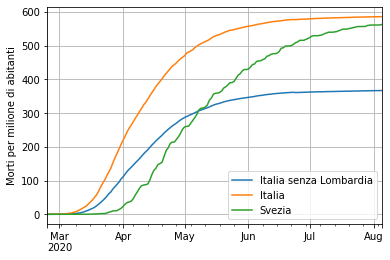

In [119]:
# svezia

df_new_deaths=df_morti.join(df_sweden,on=df_morti.index)

df_new_deaths.plot()
plt.legend(['Italia senza Lombardia','Italia','Svezia'])
plt.grid()
plt.ylabel('Morti per milione di abitanti')
plt.savefig('output3/svezia_italia.png',dpi=300)
plt.show()